<a href="https://colab.research.google.com/github/MLRG-CEFET-RJ/ml-class/blob/master/DataMining_week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Task

The regression task comprises the search for functions, linear or not, that map each example $\mathbf{x}$ to a real value. This task is similar to the classification task, being restricted to continuous target features only.

As an example of application for the regression task, consider the problem of predicting the price of a house based on its area. For this, we could use a dataset of houses, in which each house is described by two features: area and price. See the image below ([source](https://www.quora.com/What-is-regression-in-machine-learning)).

![alt text](https://qph.fs.quoracdn.net/main-qimg-879a11eca63b46918c10e82deebb322b)

If we assume that there is a polynomial of degree 2 that captures the relationship between the two features, we could build a regression model for the problem. This model is depicted as the pink line in the image below.

![alt text](https://qph.fs.quoracdn.net/main-qimg-b6935fdb7f8a68706698ac1b29ed22df)

Notice that a degree-2 polynomial for the problem described above would have the following form:

$$
\operatorname{price} = \theta_0 + \theta_1 \times \operatorname{area}  + \theta_2 \times \operatorname{area} \times \operatorname{area}
$$


Suppose the values of $\theta_0$, $\theta_1$ have already been determined through some regression algorithm. In particular, let $\theta_2$ be 0, 200 and 10 respectively. Using these values, the model would predict the price of a house with area 45 meter squared as follows:

$$
\operatorname{price} = (0+200∗45+10∗45∗45) \text{ dollars}
$$

which would result in \$ 29,250. this value corresponds to the red cross in the image above.

You should notice the similarity between the model representation used in the logistic regression algorithm (for classification) and the one appearing here. In both cases, the model corresponds to a vector of coefficients $\Theta = [\theta_0, \theta_1, \theta_2, \ldots, \theta_n]$.

---

Some other examples of applications of the regression task are the following.

* prediction of the sum of biomass present in a forest;
* prediction of the risk of certain investments,
* setting the credit card limit for each customer at a bank.

---
In this notebook, we are going to study three algorithms for producing regression models:

* Linear Regression (and is variants)
* $k$-NN
* Decision tree learning


## Evaluation metrics

As in the classification task, we can evaluate the predictive performance of a regression model. Three metrics are commonly used to evaluate regression models.

* Mean Squared Error
$$
\operatorname{MSE} = \frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-h_{\Theta}(x^{(i)}))^{2}
$$

* Root Mean Squared Error (the square root of MSE).
$$
\operatorname{RMSE} = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-h_{\Theta}(x^{(i)}))^{2}}
$$

* Mean Absolute Error

$$
\operatorname{MAE} = \frac{1}{m}\sum_{i=1}^{m}\mid y^{(i)}-h_{\Theta}(x^{(i)}) \mid
$$

In the expressions above:

* $h_{\Theta}$ represents the regression model learned by the algorithm, that is, $h_{\Theta}(x^{(i)})$ is the predicted value for example $x^{(i)}$;
* $m$ is the amount of examples; 
* $(x^{(i)}, y^{(i)})$ is the $i$-th example.

Let us detail how the MSE measure is computed. For each of the $m$ training examples, the square of the difference between the value predicted by the model and the real value is computed first. Then, we add all these squared differences and divide by $m$ to obtain a single number. The final result is a statistic that represents the average distance between the model's predictions and the actual values. 

The following figure illustrates this calculation process. Suppose that the blue line is a regression model produced by some regression algorithm. In this case, $\operatorname{MSE}$  would produce a value that is a function of the distances of each example in the dataset (red dots) to the regressed line. These distances are depicted as green line segments. The average of the squred lengths of the green segments is the value of $\operatorname{MSE}$. 

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png)

In general, regression algorithms search for a setting of parameters that minimizes the value of one of the above measures.



Scikit-Learn provides functions to compute each of the evaluation metrics above, as shown in the following example. This example uses the [Diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) dataset, which comes with Scikit-Learn.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes_df.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object (more about that later)
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(diabetes_X_train, diabetes_y_train)

y_pred = regr.predict(diabetes_X_test)

print('Mean Absolute Error:', mean_absolute_error(diabetes_y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(diabetes_y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(diabetes_y_test, y_pred)))

Mean Absolute Error: 41.227091289761454
Mean Squared Error: 2548.0723987259694
Root Mean Squared Error: 50.478434986892864


## Linear Regression

### OLS linear regression

Linear regression is the simplest form of regression, where the function to be induced from the data is a linear function. Univariate linear regression is the simplest case, in which a random variable $y$ (called *dependent variable*) is represented as a linear function of another variable $x$ (called *independent variable*). More formally, considering just one predictive feature, the objective is, from the existing data, to define adequate values ​​for the parameters $\theta_0$ and $\theta_1$ of the linear function represented by the equation below:

$$
	y = \theta_0 + \theta_1x + \epsilon
$$

In the above equation, $\epsilon$ is the error of the prediction, which is assumed to follow a normal distribution. In addition, the variance of the variable $y$ is considered constant, and $\theta_0$ and $\theta_1$ are called the coefficients of the linear regression. These coefficients can be derived from the data. Thus, taking as input $m$ samples of the data: $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$, it is possible to estimate the linear regression coefficients $\theta_0$ and $\theta_1$. The explanation is similar for the case of multivariate linear regression, in which there are several predictive attributes in the data matrix used in the training.

The simplest method of linear regression is called *ordinary least squares* (OLS). In OLS, a vector of *parameters* (also called *coefficients*) is adjusted during training. This vector represents a hyperplane that best fits the training data. Mathematically, OLS linear regression seeks to solve the following problem:

$$
\min_{\Theta} || X \Theta - y||_2^2
$$

In the expression above, $\Theta$ is the coefficient vector, $X$ is the training data matrix, and $y$ is the response vector with values ​​of the target feature.

Once the regression model was fitted (and consequently the coefficient vector $\Theta = [\theta_0, \theta_1, \ldots, \theta_n]$ was determined), the predicted value of the target feature for an example with values of predictive features $x_1, x_2, \ldots, x_n$ is given by:

$$
\hat{y} = h_\Theta(x^{(i)}) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} + \ldots + \theta_n x_{n} = \Theta^T \mathbf{x}
$$

In the above expression, $\mathbf{x}$ is the vector of attributes with an extra dimension $ x_0 = 1 $ (to maintain the compatibility of the scalar product operation).

See the animation below ([source](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)) that illustrates the behavior of linear regression OLS, for the one-dimensional case, where $h_\Theta(x) = \theta_0 + \theta_1 x$. See also the animation available at http://setosa.io/ev/ordinary-least-squares-regression/.

![alt text](https://miro.medium.com/max/800/1*fX95txC9xSwSPeP6ch2nmg.gif)

The following image ([source](https://www.clockbackward.com/2009/06/18/ordinary-least-squares-linear-regression-flaws-problems-and-pitfalls/)) illustrates the bivariate case of OLS regression.

![alt text](http://www.clockbackward.com/wp-content/uploads/2009/06/points3DwPlane.png)

See this interactive explanation [here](https://setosa.io/ev/ordinary-least-squares-regression/) of OLS. 



#### Class LinearRegression

The class [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) of Scikit-Learn implements OLS linear regression. A simple example of using this class is provided below.

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

# think of this as the data matrix
X = [[0, 0], [1, 1], [2, 2]]

# think of this as the response vector
y = [0.2, 1.3, 2.5]

# Fit the linear regression model
reg.fit(X, y)

# print the models' parameters
print(reg.intercept_) 
print(reg.coef_)

0.1833333333333338
[0.575 0.575]


As always in Scikit-Learn API, the function `predict` allows us to use the model for prediction.

In [ ]:
import numpy as np 
reg.predict(np.array([[3, 5]]))

array([4.])

The following example ([source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)) uses a single predictive feature of the [diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) dataset to illustrate the application of OLS regression. In the example, a two-dimensional plot is displayed that shows how linear regression attempts to fit a straight line that minimizes the *residual sum of squares* between the responses observed in the dataset and the responses predicted by the linear approximation. The coefficients, the residual sum of the squares and the variance score are also calculated.

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


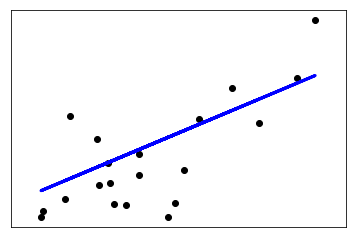

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# For simplicity's sake, use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
# NB: in a real example. train_test_split 
#     would be the appriate function to 
#     use here.
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training set
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In the example above, also note the use of the `r2_score` function. In a regression task, the value returned by this function corresponds to the variance explained by the model: 1 corresponds to the perfect prediction, and zero means that there is no linear relationship between $X$ and $y$. This value is known as the coefficient of determination and is computed using the following equation:

$$
R^{2}\equiv 1-{SS_{\rm {res}} \over SS_{\rm {tot}}}
$$

The following figure gives an intuition about the meaning of the $R^2$ score. The better the linear regression (on the right) fits the data compared to the simple average (in the graph on the left), the closer the value of $R^{2}$ will be. The areas of the blue squares ($SS_{\rm{res}}$) represent the square residues in relation to the linear regression. The areas of the red squares ($SS_{\rm{tot}}$) represent the square residues in relation to the average value.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Coefficient_of_Determination.svg/600px-Coefficient_of_Determination.svg.png)

The following code presents another example of using the `LinearRegression` class from Scikit-Learn, this time on the [Boston Housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) dataset from Scikit-Learn. In this dataset, the target feature is the average residential price of houses of Boston districts.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Load the dataset
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)

print('Dimensionality of the data matrix: ', X.shape)

# Fit the regression model
regr = LinearRegression()
model = regr.fit(X_train, y_train)

# Print the fist coefficient (intercept)
print('Intercept: ', model.intercept_)

# Print other coeficients
print('Other coeficients:\n', model.coef_)

print('R^2 score on the test dataset:\n', model.score(X_test, y_test))

# Applis the model on the first five test examples.
print('Predictions for the first 5 observations in the test dataset:\n', 
      list(model.predict(X_test)[0:5]))

Dimensionality of the data matrix:  (506, 13)
Intercept:  30.246750993923925
Other coeficients:
 [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
R^2 score on the test dataset:
 0.6687594935356307
Predictions for the first 5 observations in the test dataset:
 [28.996723619824863, 36.02556533567223, 14.816944045388286, 25.031979150399586, 18.769879915248087]


#### Interpretation of coeficients

One nice characteristic of OLS is that the coefficients of a model can be interpreted. For a better intuition about the values ​​produced for the coefficients of a linear regression model, consider again the [Boston Housing](https://scikit-learn.org/stable/datasets/index.html#boston-dataset) dataset. The following code prints the coefficients corresponding to each attribute of that data set.

In [ ]:
coeff_df = pd.DataFrame(regr.coef_, boston.feature_names, columns=['Coeficient'])  
coeff_df

,Coeficient
CRIM,-0.113056
ZN,0.030110
INDUS,0.040381
CHAS,2.784438
NOX,-17.202633
RM,4.438835
AGE,-0.006296
DIS,-1.447865
RAD,0.262430
TAX,-0.010647


The features with higher coefficients (in magnitude) are as follows:

* NOX: nitric oxides concentration (concentration in parts per 10 million)
* RM: average number of rooms per dwelling

This means that, for a unitary increase in the concentration of nitrite oxides, there is a decrease of ~17.20 units in the average residential price. Likewise, an increase of one unit in the average number of bedrooms per household results in an increase of ~4.43 units in the average price of homes. We can also see that most of the remaining features have little effect on the average residential price.

#### Multicolinearity

The quality of the coefficient estimates performed by the method of ordinary least squares depends on the independence of the predictive features. When these features are correlated and the columns of the data matrix have some approximately linear dependency, the data matrix becomes almost *singular* (i.e., becomes a matrix that has no inverse). As a result, the estimation of least squares becomes highly sensitive to random errors eventually present in the values ​​of the target feature, producing a large variance. This situation is known as *multicollinearity*.

Some examples of correlated predictive variables (also called multicollinear predictors) are:

* height and weight of a person,
* age and selling price of a car
* years of education and annual income.

One way to detect multicollinearity in a dataset is to perform exploratory analysis before fitting the regression model. In the following example, the seaborn library is used to generate graphs that represent the pairwise relationships between the predictive features of the Boston Housing dataset.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


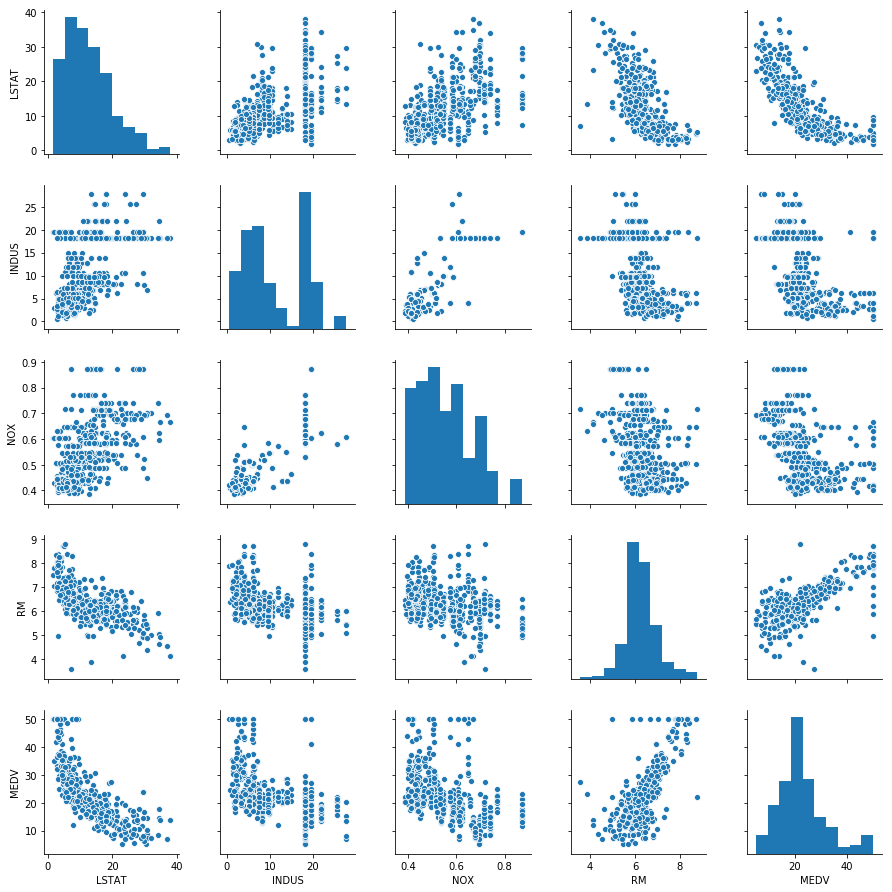

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
   'python-machine-learning-book-2nd-edition'
   '/master/code/ch10/housing.data.txt',
   header=None,
   sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
   'NOX', 'RM', 'AGE', 'DIS', 'RAD',
   'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

Another way to detect collinearity is to produce a correlation matrix. Intuitively, we can interpret the correlation matrix
as a resized version of the covariance matrix. In fact, the correlation matrix is ​​identical to a covariance matrix calculated from standardized features.

See the following example, which illustrates the construction of a correlation matrix for some features of the Housing Boston dataset, again using the seaborn library.

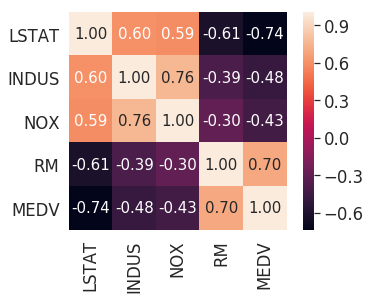

In [ ]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
   cbar=True,
   annot=True,
   square=True,
   fmt='.2f',
   annot_kws={'size': 15},
   yticklabels=cols,
   xticklabels=cols)
plt.show()

### Polynomial Regression

One downside of OLS is that it can only learn linear relationships between the predictive features and the target. For example, in the dataset below, it seems to exist a non-linear relationship.

![alt text](https://qph.fs.quoracdn.net/main-qimg-b6935fdb7f8a68706698ac1b29ed22df)

In case like the one described above, it may be useful to use create of predicitve features to allow for more complex model.

The class[`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) of Scikit-Learn can be used to create derived features for some combinations of the original features in a dataset. This is a way to perform *feature engineering*. From the Wikipedia:

> Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms. Feature engineering can be considered as applied machine learning itself.

As an example, consider a dataset with only two predictive features, $x_1$ and $x_2$. We can create a linear regression model that considers a third feature, and this new attribute corresponds to the interaction between $x_1$ and $x_2$:

$$
\hat{y} = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{1}x_{2} + \epsilon
$$

In the above expression, $x_1$ and $x_2$ are the values ​​of the two original features, and $x_1 \times x_2$ represents the value of a new feature that considers the interaction between $x_1$ and $x_2$. We can use model selection strategies to identify the combination of features and terms of interaction that produce the best model.

After creating these new features, a linear regression model can be adjusted to the new data set.

Adding interaction features has the potential to generate more flexible models. However, the resulting models are also more susceptible to overfitting, as shown in the following figure ([source](https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py)).

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png)

The following block of code illustrates the creation of interaction features through the function `fit_transform` of the class `PolynomialFeatures` of Scikit-Learn. The value of the `degree` parameter defines the degree of the polynomial to be used. The `interaction_only` (*boolean*) parameter indicates whether self-interaction terms should be created.

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)

print('Original data matrix:\n', X)

poly = PolynomialFeatures(degree=2)
print('Terms for polynomial regression of degree 2:\n', poly.fit_transform(X))

poly = PolynomialFeatures(degree=2, interaction_only=True)
print('Terms for polynomial regression of degree 2 (only interactions):\n', poly.fit_transform(X))

Original data matrix:
 [[0 1]
 [2 3]
 [4 5]]
Terms for polynomial regression of degree 2:
 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]
Terms for polynomial regression of degree 2 (only interactions):
 [[ 1.  0.  1.  0.]
 [ 1.  2.  3.  6.]
 [ 1.  4.  5. 20.]]


The following block of code illustrates the use of OLS regression with interaction features. Notice that, in this setting OLS is able to fit arbitrary polynomials to a training dataset.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

# Load the data with only two features
boston = load_boston()
X = boston.data[:,0:2]
y = boston.target

print(X.shape)

interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
X_inter = interaction.fit_transform(X)

print(X_inter.shape)

regr = LinearRegression()

model = regr.fit(X_inter, y)

(506, 2)
(506, 3)


The following example illustrates the purpose of the `include_bias` parameter. If this parameter is set to `True` (the default value), the transformation includes a column in which all polynomial powers are zero (that is, a column of units. This column acts as an *intercept term* in a linear model.

In [ ]:
interaction = PolynomialFeatures(degree=3, interaction_only=True)
interaction.fit_transform(X)

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, 1.1376e-01],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, 0.0000e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, 0.0000e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, 0.0000e+00]])

The following example ([source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html#sphx-glr-auto-examples-linear-model-plot-polynomial-interpolation-py)) illustrates the fitting of polynomials of different degrees on a dataset.

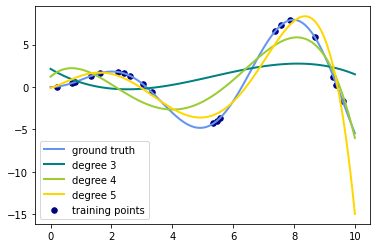

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

### (EXTRA) Regularized Linear Regression

The variants of the linear regression called *Ridge* and *Lasso* are some of the techniques used to reduce the complexity of the fitted model and hence avoid *overfitting*.

#### Ridge

The [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) class of Scikit-Learn implements the Ridge regularization regression. This class has a parameter called `alpha`, which corresponds to the hyperparameter called *regularization term*. This hyperparameter allows controlling how much we penalize the coefficients. High values ​​of `alpha` result in the creation of simpler models. The ideal value of `alpha` should be adjusted, like any other hyperparameter, through model selection *model selection*.

In view of the minimization problem, Ridge regularization corresponds to adding a portion to the cost function, as shown below.

$$
\begin{align}
\min_{\Theta} J(\Theta) &= \min_{\Theta} || X \Theta - y||_2^2 + \alpha ||\Theta||_2^2 \\ &= \min_{\Theta} \frac{1}{2m} \left[ \sum _{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right)^2 + {\alpha\sum_{j=1}^{n} \theta_j^{2}} \right]
\end{align}
$$

For a graphical intuition of the  effect of differente values for the hyperparameter $\alpha$, consider the figure below ([source](https://scikit-learn.org/stable/modules/linear_model.html)). In this figure, each line corresponds to the value of one of the coefficients. Note that $\alpha$ controls the amount of *shrinkage* applied to the coefficients: the higher the value of $\alpha$, the greater the amount of shrinkage and, therefore, the coefficients become more robust to collinearity.

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_ridge_path_0011.png)



In Scikit-Learn, linear regression with Ridge regularization is implemented in the class [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge). See the example below.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# Carrega os dados
boston = load_boston()
X = boston.data
y = boston.target

# Padroniza os atributos, operação importante na tarefa de regressão linear.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Ajusta o modelo de regressão linear
regr = Ridge(alpha=0.5)
model = regr.fit(X_std, y)

The next code example ([source](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html)) illustrates the effect of using Ridge smoothing. In this example, 12 regression models are generated, 6 with OLS regression and the other 6 with regularized OLS regression (ridge). Note that the models generated in the first case have a much greater variance.

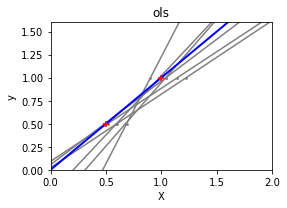

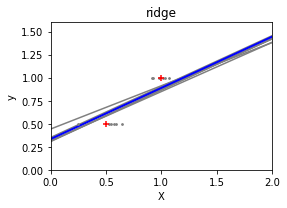

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

X_train = np.c_[.5, 1].T
y_train = [.5, 1]
X_test = np.c_[0, 2].T

np.random.seed(0)

classifiers = dict(ols=linear_model.LinearRegression(),
                   ridge=linear_model.Ridge(alpha=.1))

for name, clf in classifiers.items():
    fig, ax = plt.subplots(figsize=(4, 3))

    for _ in range(6):
        this_X = .1 * np.random.normal(size=(2, 1)) + X_train
        clf.fit(this_X, y_train)

        ax.plot(X_test, clf.predict(X_test), color='gray')
        ax.scatter(this_X, y_train, s=3, c='gray', marker='o', zorder=10)

    clf.fit(X_train, y_train)
    ax.plot(X_test, clf.predict(X_test), linewidth=2, color='blue')
    ax.scatter(X_train, y_train, s=30, c='red', marker='+', zorder=10)

    ax.set_title(name)
    ax.set_xlim(0, 2)
    ax.set_ylim((0, 1.6))
    ax.set_xlabel('X')
    ax.set_ylabel('y')

    fig.tight_layout()

plt.show()

O Scikit-Learn fornece a classe utilitária [`RidgeCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html), cujo propósito é realizar busca em grade (*grid search*) sobre o espaço de valores do hiperparâmetro `alpha`. Veja o exemplo a seguir.

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

# Carga do dados
boston = load_boston()
X = boston.data
y = boston.target

# Padrnoização dos atributos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Cria a grade de valores sobre os quais realizar a busca
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

# ajusta o modelo 
model_cv = regr_cv.fit(X_std, y)

# Imprime o melhor alpha encontrado na busca.
print(model_cv.alpha_)

1.0


O exemplo a seguir ([fonte](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)) ilustra o efeito de diferentes valores do parâmetro alpha sobre o resultado da regressão linear. No gráfico gerado, repare como os valores absolutos dos coeficientes são menores quando alpha é maior (igual a 100).

Matriz de dados:
       CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03

[3 rows x 13 columns]
linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576845


ridge regression train score low alpha: 0.7419034944860321
ridge regression test score low alpha: 0.7147822192097744


ridge regression train score high alpha: 0.7173448802244163
ridge regression test score high alpha: 0.6875172621506159




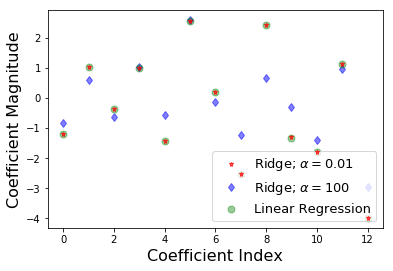

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

# add another column that contains the house prices which in scikit learn datasets are considered as target
boston_df['Price'] = boston.target

#print boston_df.head(3)
newX = boston_df.drop('Price',axis=1)

print('Matriz de dados:\n', newX[0:3])

newY = boston_df['Price']

X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size=0.3, random_state=3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("\n")

print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("\n")

print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)
print("\n")

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

#### LASSO

LASSO (*Least Absolute Shrinkage and Selection Operator*) is a linear model that estimates vectors of *sparse* coefficients. This variant is useful in some contexts due to its tendency to prefer solutions with fewer coefficients other than zero, effectively reducing the number of attributes on which the adjusted model depends.

From the point of view of optimization, the regularized regression Lasso seeks to minimize the following function during training:

$$
J(\theta) = \frac{1}{2m} \left[ \sum _{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right)^2 + \alpha\sum_{j=1}^{n} | \theta_j | \right]
$$


The following example ([source](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)) illustrates the effect of LASSO regression on coefficient values.

training score: 0.5600974529893081
test score:  0.5832244618818156
number of features used:  4
training score for alpha=0.01: 0.7037865778498826
test score for alpha =0.01:  0.6641831577726228
number of features used: for alpha = 0.01: 10
training score for alpha=0.0001: 0.7754092006936699
test score for alpha =0.0001:  0.7318608210757908
number of features used: for alpha =0.0001: 22
LR training score: 0.7842206194055068
LR test score:  0.7329325010888672


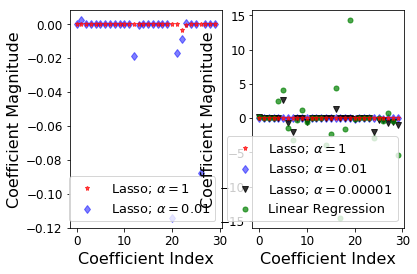

In [ ]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

matplotlib.rcParams.update({'font.size': 12})

cancer = load_breast_cancer()
#print cancer.keys()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
#print cancer_df.head(3)
X = cancer.data
Y = cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score)  
print("test score: ", test_score) 
print("number of features used: ", coeff_used) 

lasso001 = Lasso(alpha = 0.01, max_iter = 10e5)
lasso001.fit(X_train,y_train)
train_score001 = lasso001.score(X_train,y_train)
test_score001 = lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_ != 0)

print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001) 
print("number of features used: for alpha = 0.01:", coeff_used001) 

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha=0.0001:", train_score00001)  
print( "test score for alpha =0.0001: ", test_score00001)
print( "number of features used: for alpha =0.0001:", coeff_used00001)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)

plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

Similar to the previous example, the following code example ([source](https://chrisalbon.com/machine_learning/linear_regression/effect_of_alpha_on_lasso_regression/)) also illustrates the effect of different alpha parameter values ​​on the resulting model. note that, unlike Ridge regularization (which tends to produce a vector of coefficients with small inputs in magnitude, but different from zero), LASSO regularization tries to produce a sparse coefficient vector.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
scaler = StandardScaler()
X = scaler.fit_transform(boston["data"])
Y = boston["target"]
names = boston["feature_names"]

# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,
        lasso = Lasso(alpha=alpha)
        
        # Fit the lasso regression
        lasso.fit(X, Y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the datafram    
    return df

# Run the function called, Lasso
lasso([.0001, .5, 10])

,Feature Name,Alpha = 0.000100,Alpha = 0.500000,Alpha = 10.000000
0,CRIM,-0.927866,-0.115265,-0.0
1,ZN,1.081086,0.000000,0.0
2,INDUS,0.139960,-0.000000,-0.0
3,CHAS,0.681771,0.397079,0.0
4,NOX,-2.055877,-0.000000,-0.0
5,RM,2.674402,2.974259,0.0
6,AGE,0.019026,-0.000000,-0.0
7,DIS,-3.103667,-0.170569,0.0
8,RAD,2.660381,-0.000000,-0.0
9,TAX,-2.074993,-0.000000,-0.0


Since Lasso regression produces sparse models, it can be used to perform *feature selection*. In Scikit-Learn, this can be done in conjunction with the SelectFromModel class, as shown in the following example ([source](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel)). In general, the higher the value of the $ \ alpha $ parameter used, the greater the number of attributes removed.

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)

lassoreg = Lasso(alpha=0.01).fit(X, y)
model = SelectFromModel(lassoreg, prefit=True)
X_new = model.transform(X)
print(X_new.shape)

(150, 4)
(150, 3)


#### Elastic-Net

ElasticNet is a regularized linear regression model that is trained by combining the Ridge and Lasso regularizations. This combination allows you to learn a sparse model, in which few weights are different from zero like Lasso, maintaining the regularization properties of the Ridge.

Mathematically, ElasticNet regularization seeks to minimize the following cost function during model training:

$$
\min_{\Theta} { \frac{1}{2m} ||X \Theta - y||_2 ^ 2 + \alpha \rho ||\Theta||_1 +
\frac{\alpha(1-\rho)}{2} ||\Theta||_2 ^ 2}
$$

The $\rho$ hyperparameter controls the convex combination.

ElasticNet is useful when there are several attributes correlated to each other. In these situations, Lasso is likely to choose one randomly, while the elastic net is likely to choose both.

In Scikit-learn the class [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) implements this type of regularization. The $\rho$ hyperparameters are represented by the `l1_ratio` parameter (whose default value is 0.5). See the example below ([source](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)). The relevant parameter in this context is `l1_ratio`, whose documentation is transcribed below. The default value for this parameter is 0.5.

> l1_ratio : float
The ElasticNet mixing parameter, with 0 <= l1_ratio <= 1. For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty. For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2.




In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

X, y = make_regression(n_features=2, random_state=0)
regr = ElasticNet(random_state=0)
regr.fit(X, y)  

print(regr.coef_) 
print(regr.intercept_) 
print(regr.predict([[0, 0]])) 

[18.83816048 64.55968825]
1.4512607561654032
[1.45126076]


## Decision trees

Decision trees can also be used in a regression task. However, in this case, an impurity metric suitable for continuous variables (instead of Gini index and information gain) should be used. Also, the value predicted by a leaf node in a regression tree is the average of the target values for the examples inside that leaf.

One possible metric is the mean squared error (MSE). In particular, to quantify the level of impurity $I(t)$ in a node $t$ of the decision tree being built, we can apply the following expression:

$$
I(t) = \operatorname{MSE}(t) = \frac{1}{m_t}  \sum_{i \in D_t} (y^{(i)} - \overline{y}_t)^2
$$

$$
\overline{y}_t = \frac{1}{m_t} \sum_{i \in D_t} y^{(i)}
$$

In the expressions above:

* $D_t$ is the training subset at node $t$.

* $m_t$ is the size of $D_t$ (i.e., the number of training examples at node $t$).

* $y^{(i)}$ is the true value of the target feature for the $i$-th training example in $D_t$.

* $\overline{y}_t$ is the average of the predicted values for examples  in $D_t$.

Source: Python Machine Learning, 2nd ed., pp 341

In [ ]:
import numpy as np
expl = np.array([2.5, 2.5, 2.5, 2.5])
print(expl.mean())

4.25


The following example illustrates the use of the class [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), present in Scikit-Learn to induce decision tree models for regression.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets

# Load data with only two features
boston = datasets.load_boston()
X = boston.data[:,0:2]
y = boston.target

# Create decision tree classifer object
regr = DecisionTreeRegressor(random_state=0)

# Train model
model = regr.fit(X, y)

# Make new observation
observation = [[0.02, 16]]
              
# Predict observation's value  
print(model.predict(observation))

[33.]


The following code ([source](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py)) provides another example of using the class `DecisionTreeRegressor`. Notice that, if the maximum depth of the tree (controlled by the parameter `max_depth`) is set too high, the decision trees learns very fine details from the training data and learns from the noise, that is, they overfit.

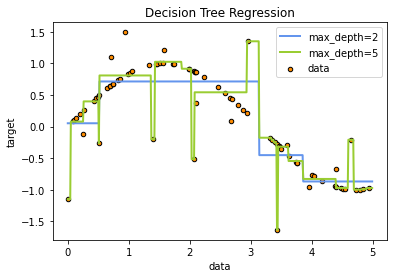

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit two regression models
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## $k$-NN

When $k$-NN is used for regression, the target values of the neighbors are averaged to computed the predicted value for the query point. The image below ([source](https://www.jeremyjordan.me/k-nearest-neighbors/)) illustrates this. On the right, we have $k$-NN in a classification context. In this case, the majority rule is applied. On the left, we have $k$-NN for regression. Is this case, the simple average of the three neighbors is used as the predicted value.

![alt text](https://www.jeremyjordan.me/content/images/2017/06/Screen-Shot-2017-06-17-at-9.30.39-AM-1.png)

A more general version of $k$-NN algorithm, called *distance weighted k-NN* can be used for producing a regression model. This algorithm computes weights $w_i$ ($1 \leq i \leq k$) associated with neighbors of a query example $x_q$ using the equation below, in which $d(x_q, x_i)$ is the distance between the query point $x_q$ and other point $x_i$ in the training set.

$$
w_i = \frac{1}{d(x_q, x_i)^2}
$$

After the weights are computed, the predicted value $\hat{y}_q$ for the query point $x_q$ is computed as follows:

$$
\hat{y}_q \leftarrow \frac{\sum_{i=1}^{k} w_i \times y_i}{\sum_{i=1}^{k} w_i}
$$

In the above expression, $y_i$ is the target value for the $i$-th neighbor. This way, the predicted value $\hat{y}_q$ is a weighted sum of the target values for the neighbors. Notice that this gives the most weight to the data points nearest to $x_q$, and the least weight to the data points that are furthest away. 

In this variant of $k$-NN for regression, it makes sense to use all training examples as neighbors (that is $k$ equals the size of the training set).

In Scikit-Learn, the class [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) implements the version of $k$-NN for regression. See the example below, which shows how to apply this class to the [Boston house price](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) dataset.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

dataset = load_boston()
print(dataset.keys())

boston_df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
print(boston_df.head(3))

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=31)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


boston_df = pd.DataFrame(X_train_scaled, columns = dataset.feature_names)
print(boston_df.head(3))

# In a practical setting, n_neighbors has to be defined using model selection.
model = KNeighborsRegressor(n_neighbors = 15, weights = 'distance')

model.fit(X_train_scaled, y_train)  #fit the model
y_pred = model.predict(X_test_scaled) #make prediction on test set
    
error = sqrt(mean_squared_error(y_test, y_pred)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k=%d is %.2f' % (K, error))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03

[3 rows x 13 columns]
       CRIM        ZN     INDUS  ...   PTRATIO         B     LSTAT
0 -0.389279  3.411723 -1.329831  ... -0.561453  0.294711 -1.125821
1 -0.386258  0.716968  0.573843  ... -0.028004  0.436368 -0.262037
2 -0.380684  0.369258 -0.607546  ...  0.149813  0.373055  0.171983

[3 rows x 13 columns]
RMSE value for k=50 is 4.37


In [ ]:
#predicting on the test set
predict = model.predict(X_test_scaled)
print(predict)

[28.26747942 14.71900206 22.22464171 20.25913378 22.55997755 23.76476085
 13.9564192  25.13218819 23.91897183 22.26196039 15.23535039 18.17024123
 18.23860928 18.57418054 14.90285359 22.62031379 22.22298975 24.28472557
 23.38714521 27.68573961 19.34440264 16.57569257 26.36501906 29.39533489
 19.99769016 20.48449326 19.97995391 22.01996112 18.98628072 24.35633002
 27.9751017  16.70884491 16.59987662 18.64992673 23.45839919 20.85547024
 27.96744737 15.80057434 15.66912717 33.35098665 12.91528709 14.40524538
 17.15206845 28.77957093 18.93500128 21.10546579 27.13052839 19.59420048
 23.29496988 25.89620951 20.07652377 18.66381045 14.15834116 28.78633783
 19.04068122 19.72884966 14.56846461 17.68683052 15.6610228  26.3116879
 17.88044938 15.57814121 22.0406903  26.082238   14.16450925 13.20187139
 23.44336993 17.73956265 26.55035112 22.81010453 19.61153444 17.04552692
 30.00557596 21.44512993 17.65988084 29.84009712 22.35672644 21.72681936
 18.15555704 21.66996167 31.63046401 24.83412266 26.